In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

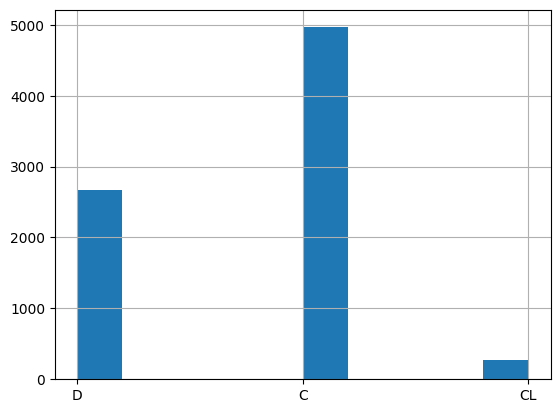

In [5]:
df["Status"].hist()

In [6]:
# unbalanced init!

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# nothing empty! lez go

In [11]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [12]:
# create train and validation sets that are divided equally

In [13]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [14]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

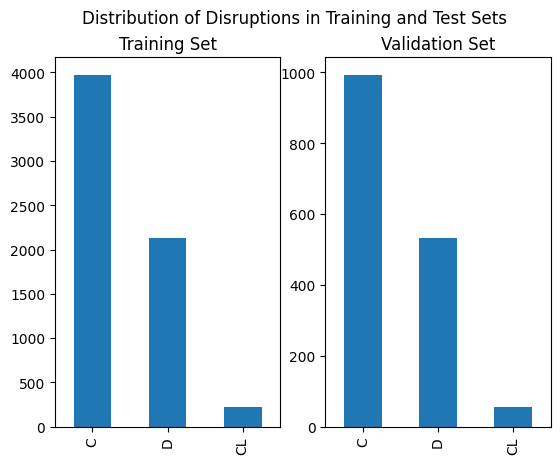

In [15]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [16]:
#the distribution is similar in training and test set

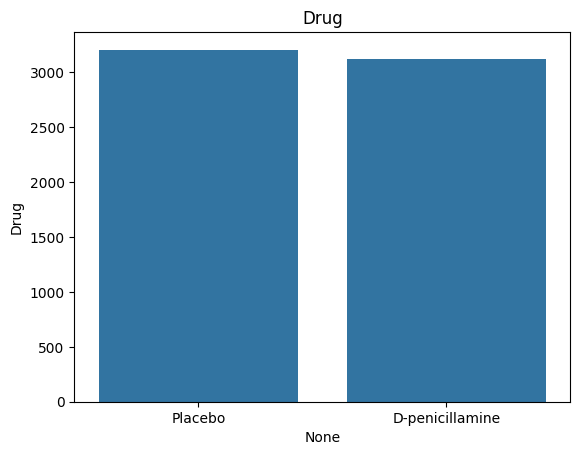

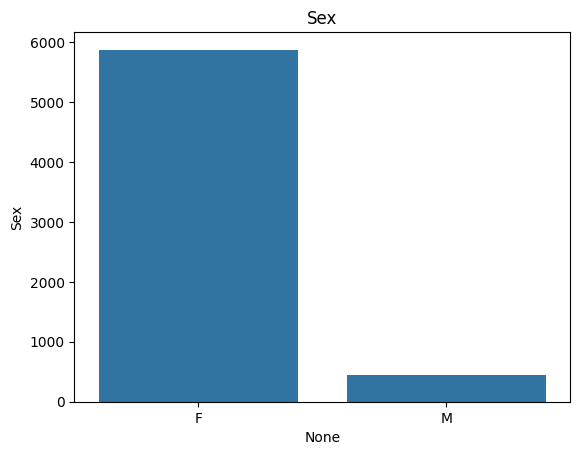

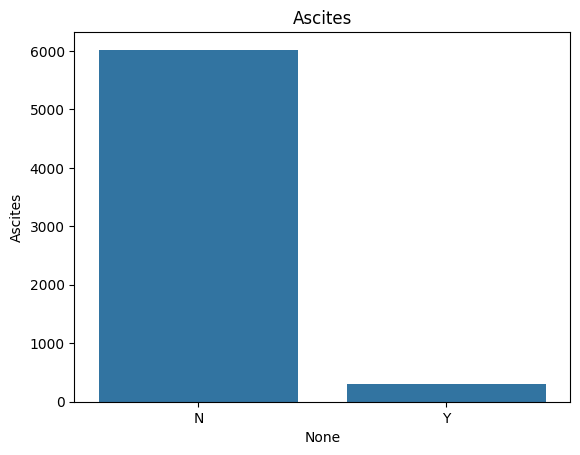

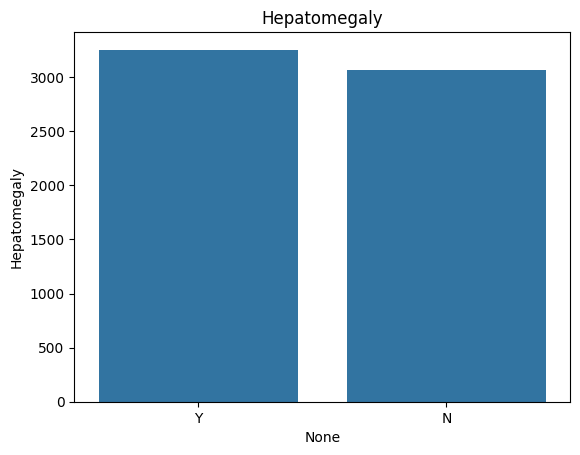

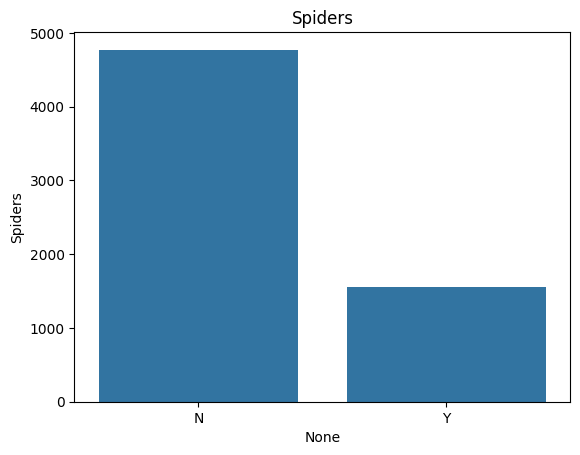

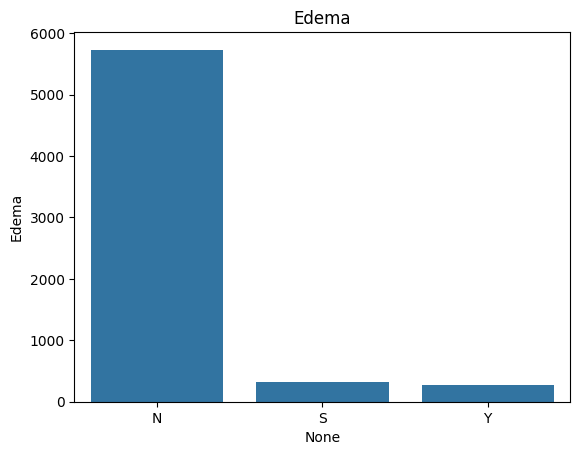

In [17]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [18]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [19]:
# Will do it in the next iteration

In [20]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [21]:
#one hot encode the status and edema

In [22]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [23]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
3091,3091,3099,1,25569,0,0,0,0,N,1.0,460.0,3.76,32.0,823.0,71.30,174.0,445.0,10.0,3.0,C,1,0,0,1,0,0
3938,3938,2769,0,18733,0,0,0,0,N,5.6,338.0,3.70,130.0,1787.0,185.00,193.0,215.0,10.4,3.0,C,1,0,0,1,0,0
3648,3648,597,0,25873,0,0,1,1,S,1.4,235.0,3.61,13.0,746.0,71.00,99.0,224.0,12.4,4.0,D,0,1,0,0,0,1
2793,2793,1300,0,18964,0,0,1,0,N,0.8,328.0,3.73,94.0,824.0,110.05,95.0,278.0,11.4,3.0,D,1,0,0,0,0,1
5942,5942,3297,0,19015,0,0,0,0,N,0.6,198.0,4.52,37.0,696.0,70.00,56.0,442.0,10.6,3.0,C,1,0,0,1,0,0


In [24]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [25]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [26]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
3091,3091,3099,1,25569,0,0,0,0,1.0,460.0,3.76,32.0,823.0,71.30,174.0,445.0,10.0,3.0,1,0,0,1,0,0
3938,3938,2769,0,18733,0,0,0,0,5.6,338.0,3.70,130.0,1787.0,185.00,193.0,215.0,10.4,3.0,1,0,0,1,0,0
3648,3648,597,0,25873,0,0,1,1,1.4,235.0,3.61,13.0,746.0,71.00,99.0,224.0,12.4,4.0,0,1,0,0,0,1
2793,2793,1300,0,18964,0,0,1,0,0.8,328.0,3.73,94.0,824.0,110.05,95.0,278.0,11.4,3.0,1,0,0,0,0,1
5942,5942,3297,0,19015,0,0,0,0,0.6,198.0,4.52,37.0,696.0,70.00,56.0,442.0,10.6,3.0,1,0,0,1,0,0


In [27]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [28]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [29]:
#visualise corelation matrix

In [30]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.004603,0.011425,-0.007509,-0.007372,0.006387,0.003193,0.002940,0.005715,-0.004347,-0.022424,0.006121,-0.003270,0.028178,-0.002494,-0.006253,0.007810,-0.010841,0.006783,-0.006348,-0.002862,-0.007609,0.013914,0.002386
N_Days,-0.004603,1.000000,0.000706,-0.099918,-0.073357,-0.262032,-0.283630,-0.207163,-0.350190,-0.144243,0.266436,-0.286470,-0.013788,-0.242526,-0.192454,0.145015,-0.158441,-0.221251,0.244078,-0.102278,-0.240770,0.343753,-0.071820,-0.323612
Drug,0.011425,0.000706,1.000000,0.092286,0.052883,0.035584,-0.063837,-0.003269,-0.040276,0.004748,-0.030028,-0.004913,0.003683,-0.044312,-0.057908,-0.013185,-0.040985,-0.035725,-0.022258,0.003882,0.027904,-0.011774,0.023294,0.003008
Age,-0.007509,-0.099918,0.092286,1.000000,0.120413,0.161515,0.110392,0.059699,0.101416,-0.053003,-0.127289,0.099541,0.017791,-0.012058,0.029700,-0.093588,0.145033,0.122475,-0.142248,0.081005,0.116950,-0.142584,-0.106302,0.186982
Sex,-0.007372,-0.073357,0.052883,0.120413,1.000000,0.038083,0.066841,-0.024145,0.039918,0.025524,-0.020519,0.164619,0.008778,0.066055,0.081168,-0.050994,0.084902,0.044325,-0.051454,0.071644,-0.003941,-0.125596,0.004274,0.126752
Ascites,0.006387,-0.262032,0.035584,0.161515,0.038083,1.000000,0.185734,0.211961,0.380102,-0.041637,-0.325263,0.273367,0.058235,0.116937,0.144618,-0.174812,0.299136,0.172074,-0.514998,0.101700,0.632634,-0.259910,-0.022492,0.274449
Hepatomegaly,0.003193,-0.283630,-0.063837,0.110392,0.066841,0.185734,1.000000,0.325278,0.293049,0.137457,-0.275820,0.272901,0.123335,0.206435,0.162923,-0.190192,0.251599,0.502833,-0.223077,0.137237,0.172261,-0.395250,0.032459,0.391520
Spiders,0.002940,-0.207163,-0.003269,0.059699,-0.024145,0.211961,0.325278,1.000000,0.250843,0.039092,-0.232100,0.260090,0.067153,0.145859,0.073681,-0.171557,0.272869,0.281460,-0.263026,0.136867,0.230356,-0.314592,0.018065,0.314635
Bilirubin,0.005715,-0.350190,-0.040276,0.101416,0.039918,0.380102,0.293049,0.250843,1.000000,0.300209,-0.309367,0.431491,0.135684,0.373602,0.314727,-0.081258,0.295163,0.203524,-0.316899,0.139326,0.305468,-0.417446,0.016472,0.420410
Cholesterol,-0.004347,-0.144243,0.004748,-0.053003,0.025524,-0.041637,0.137457,0.039092,0.300209,1.000000,-0.094871,0.161564,0.130530,0.327853,0.277368,0.094650,0.018544,0.041287,0.037313,-0.005914,-0.047425,-0.186672,0.061333,0.167078


<Axes: >

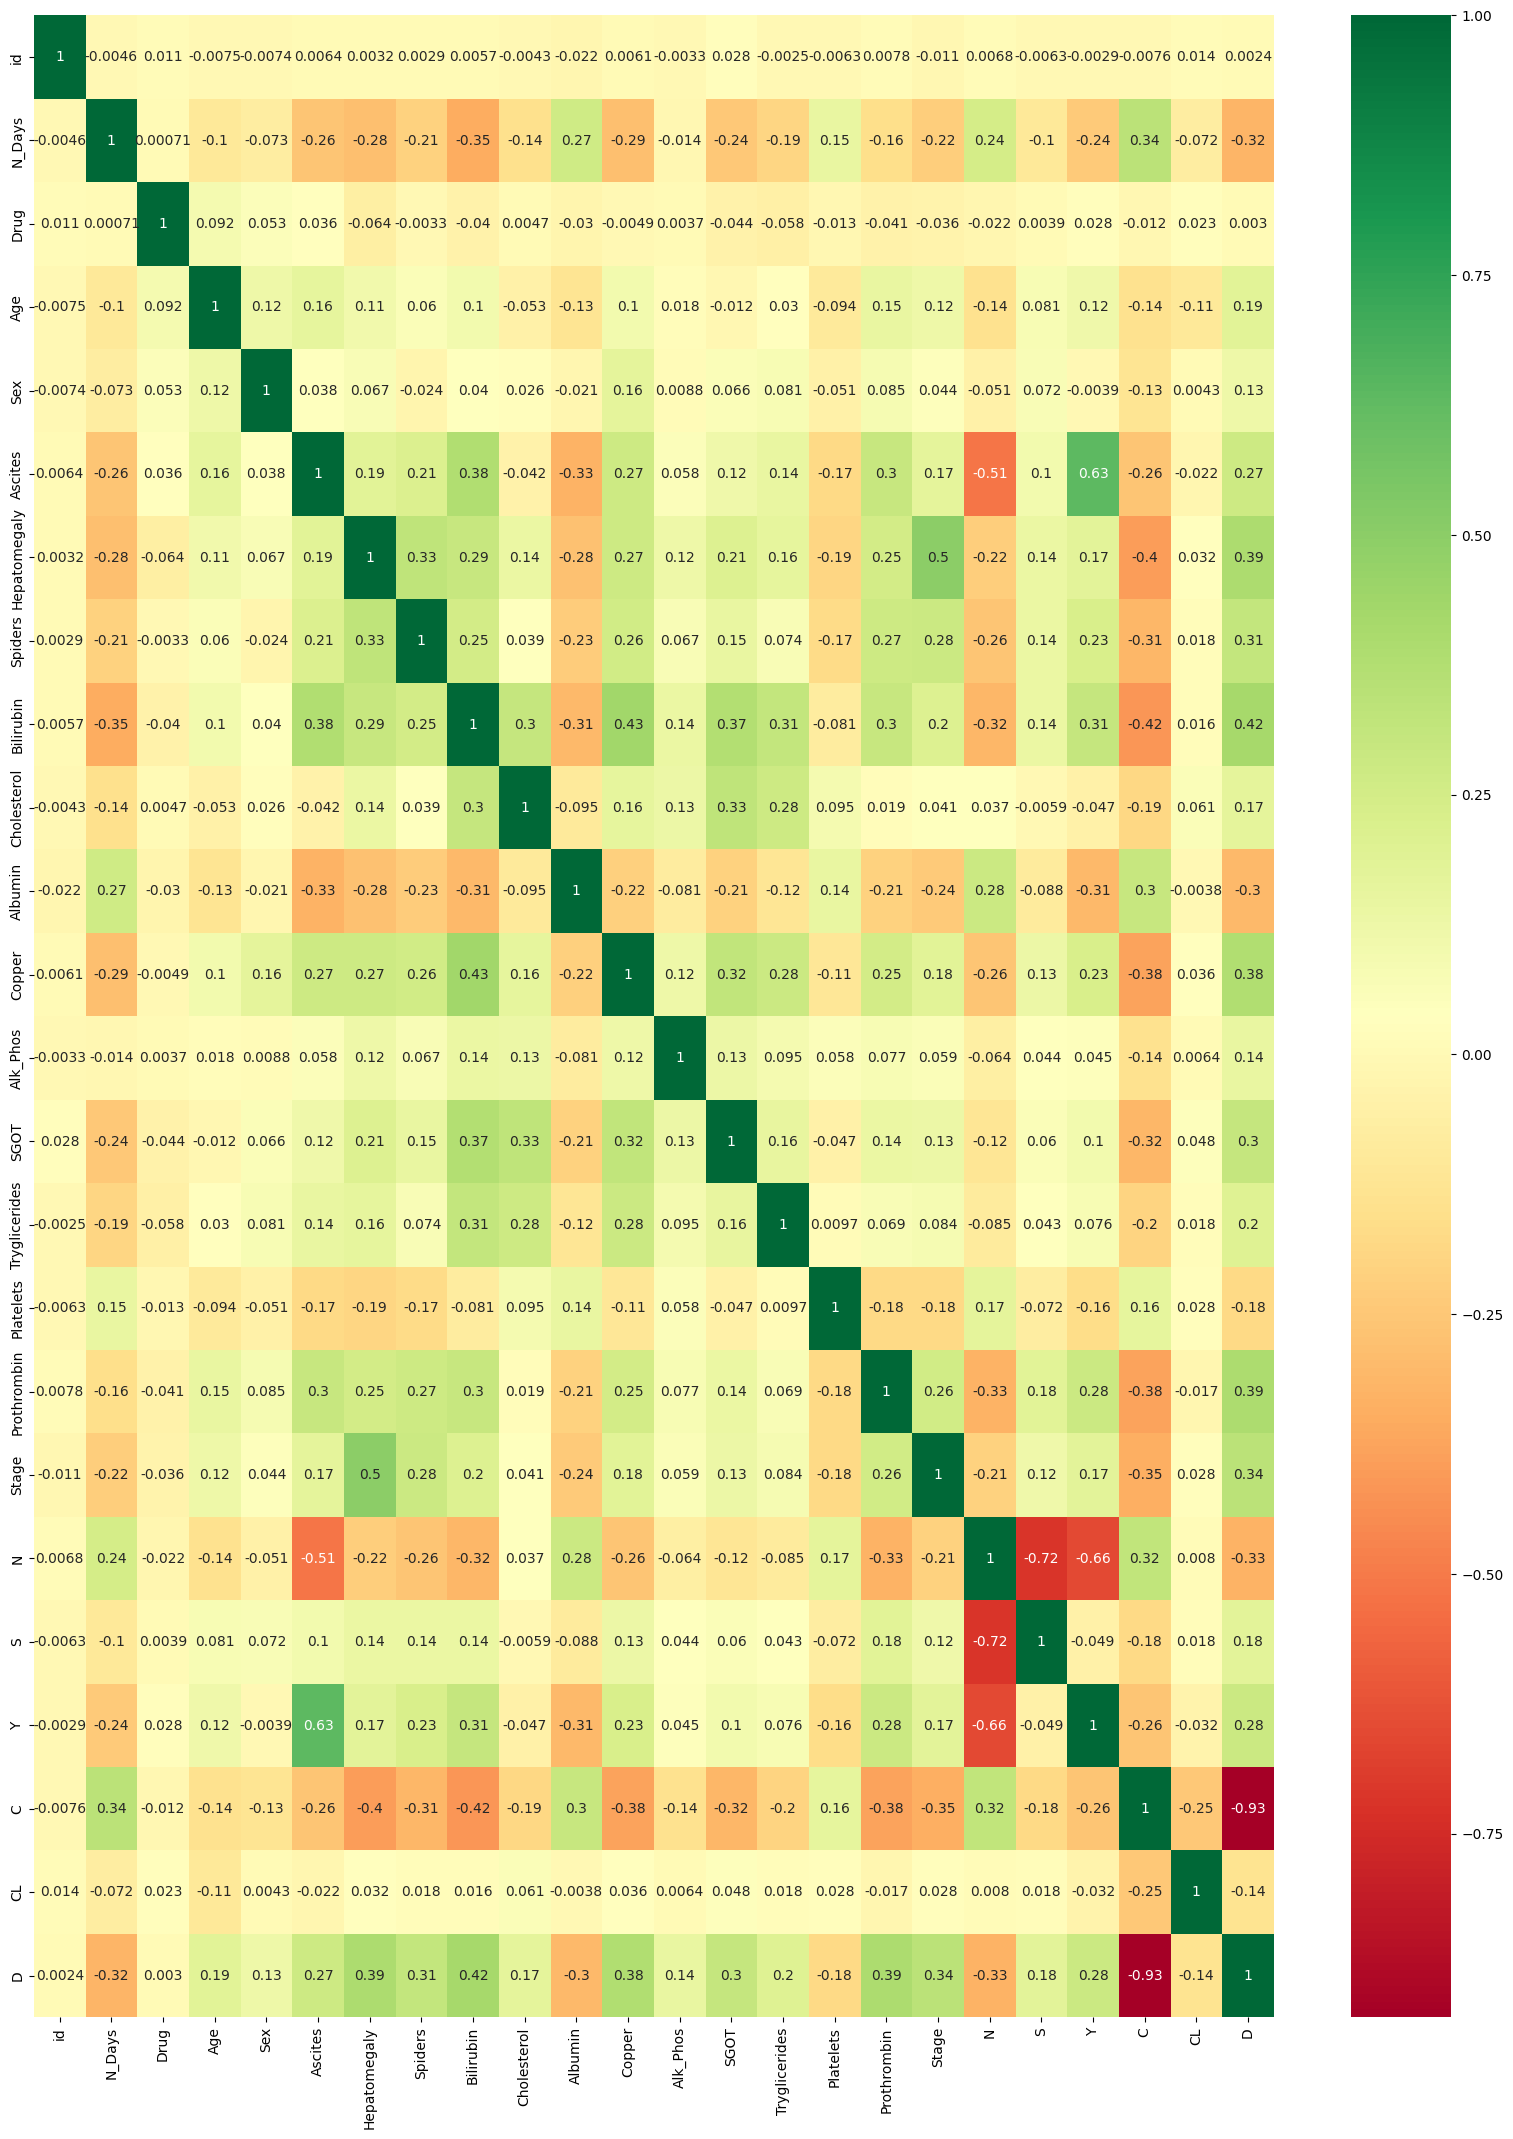

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [32]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

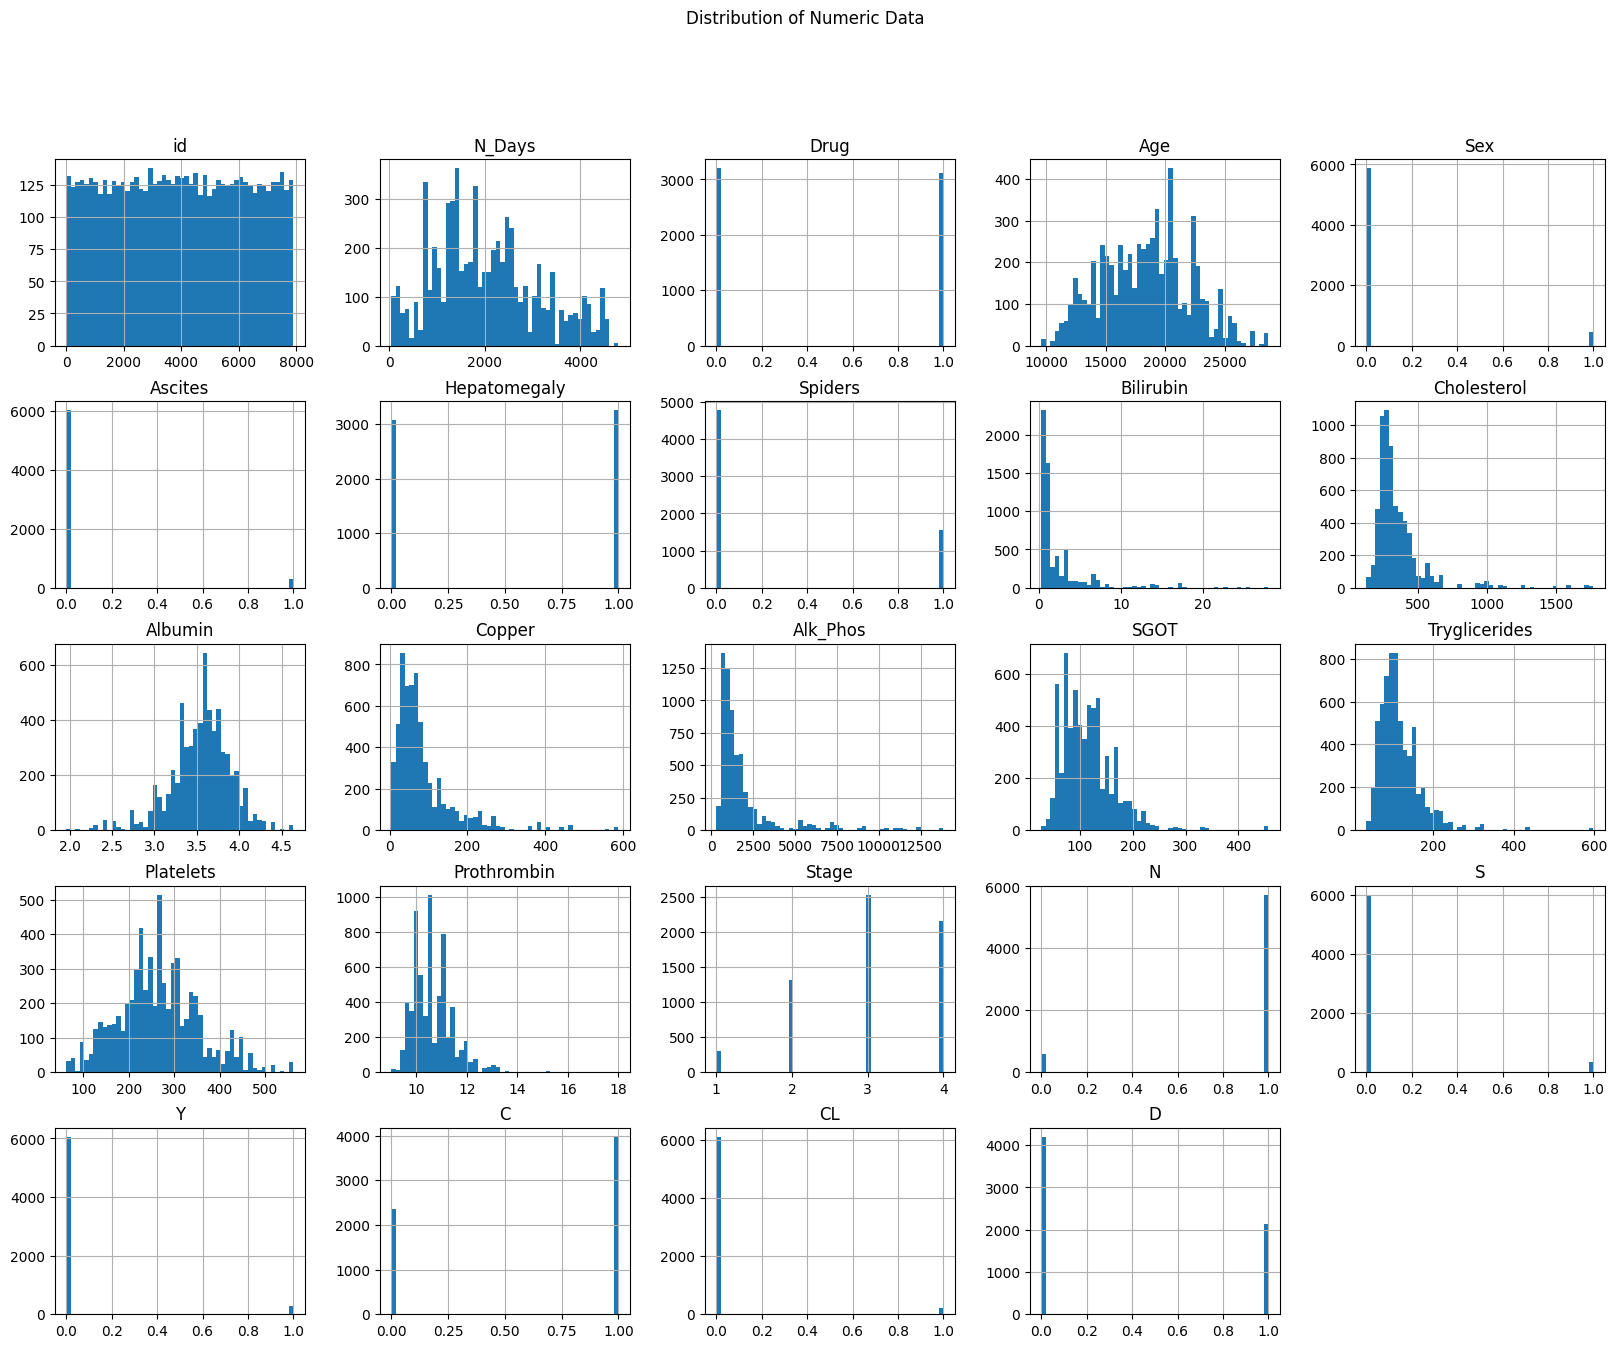

In [33]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [34]:
#Most of the data here needs to be normalised, mostly right skewed

In [35]:
# lets look at the ones that matter

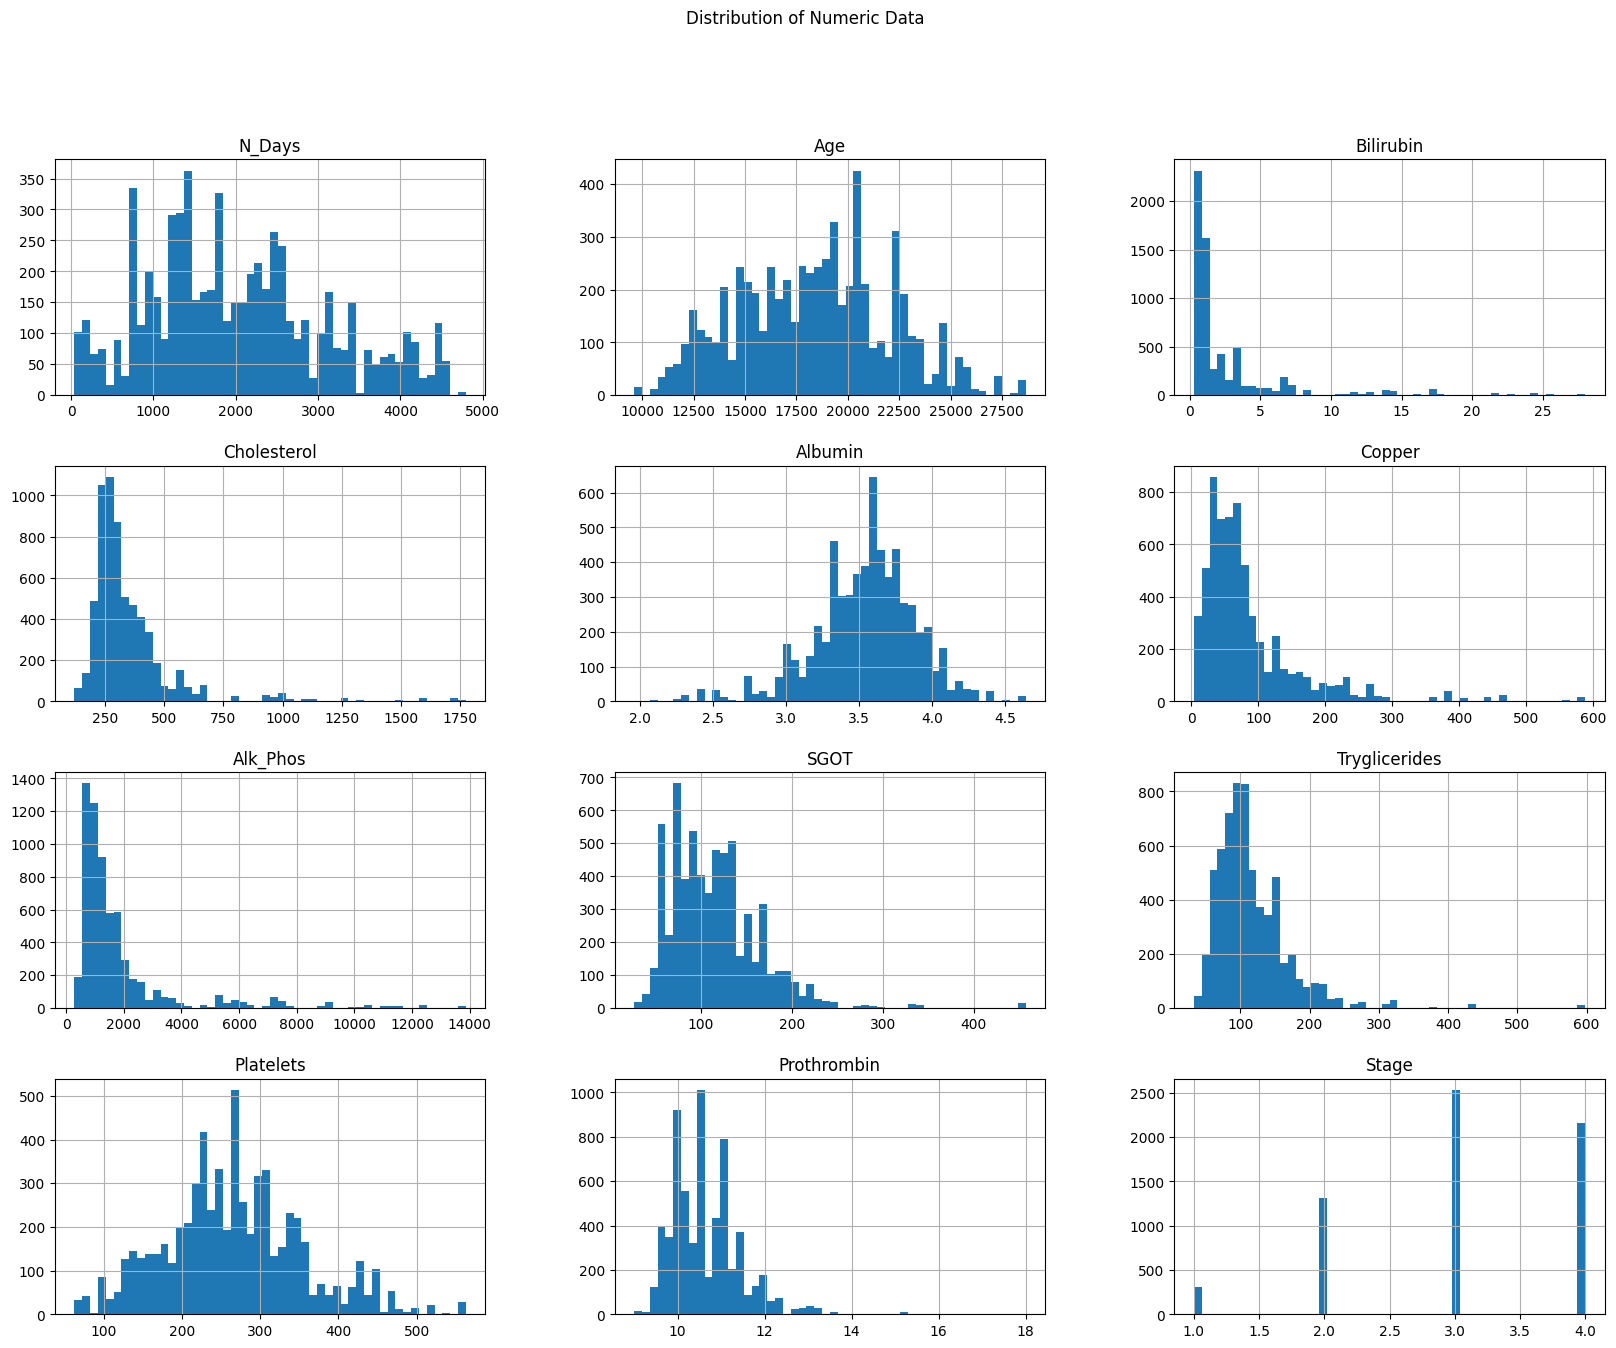

In [36]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [38]:
# viz after scaling

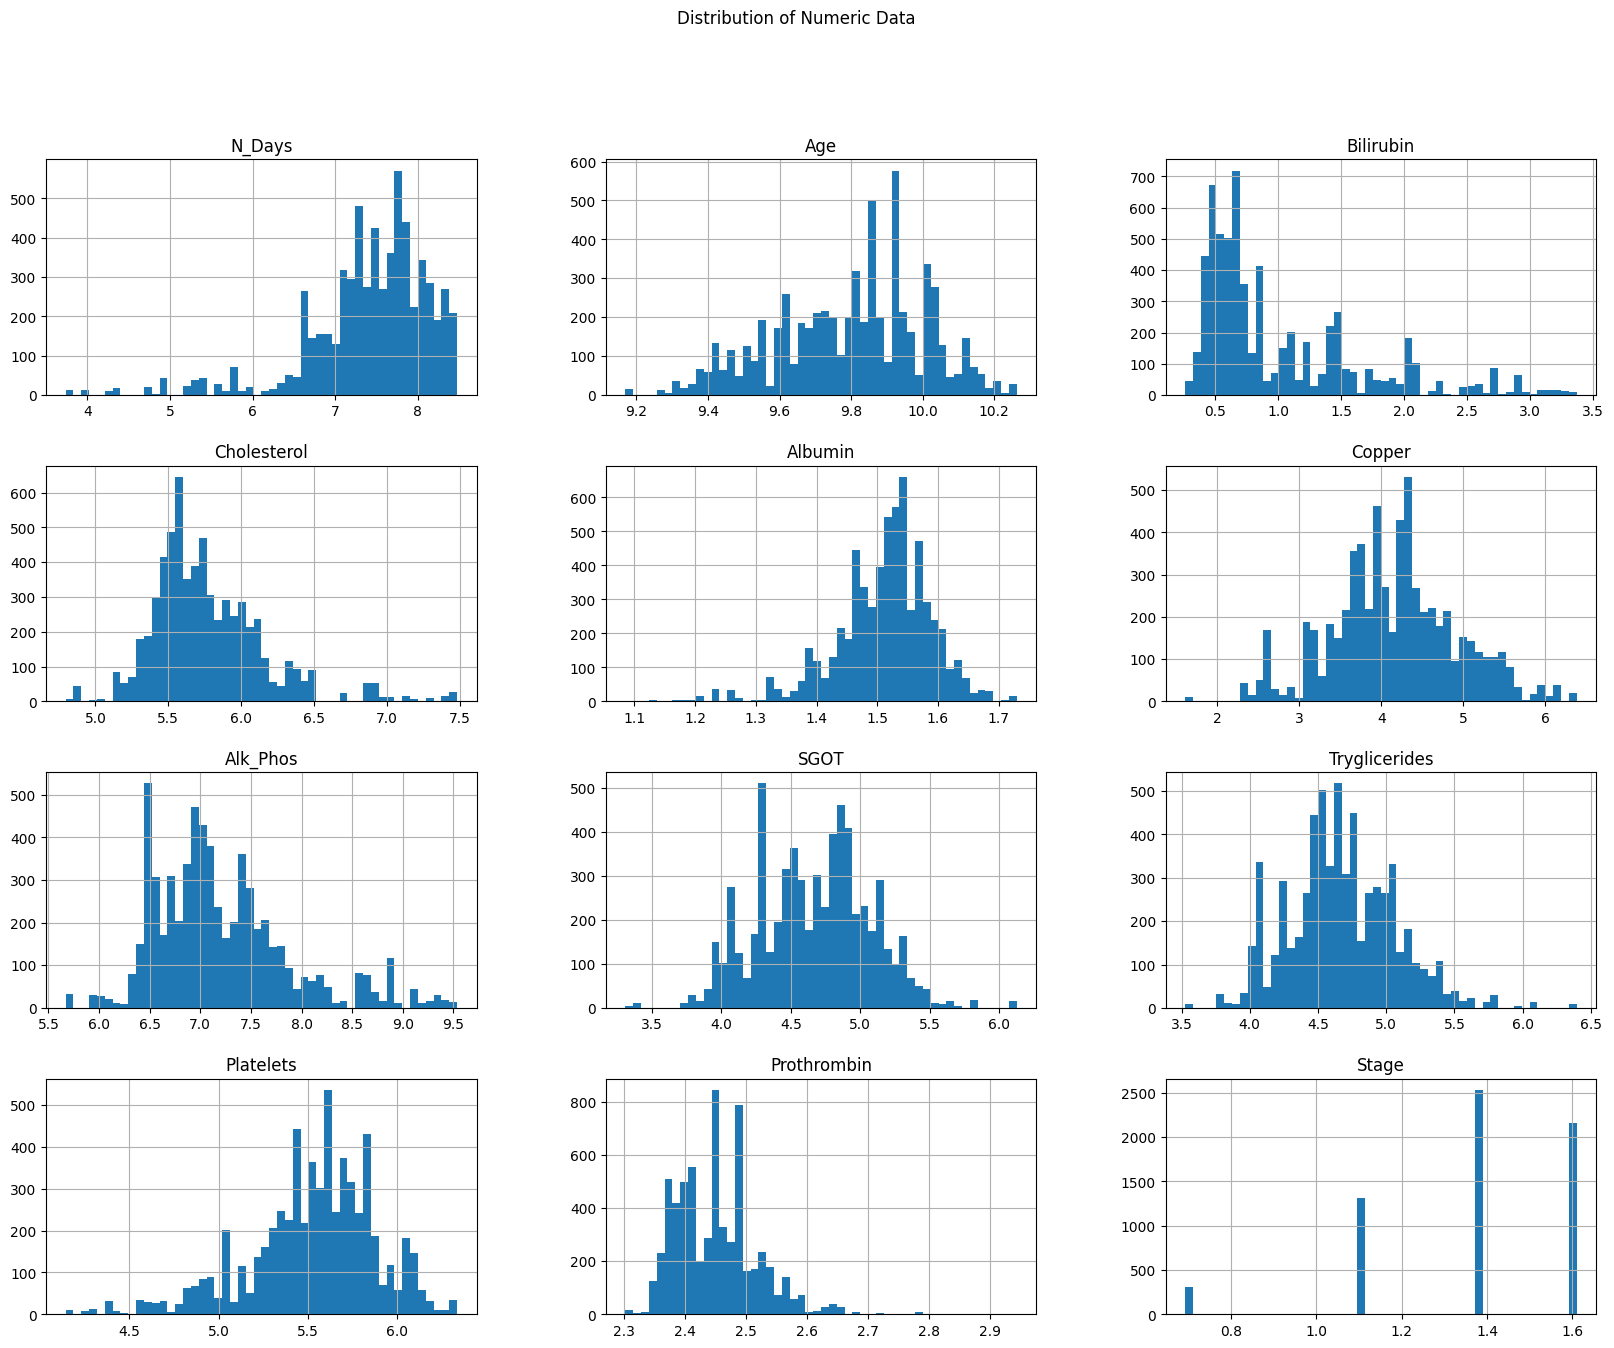

In [39]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

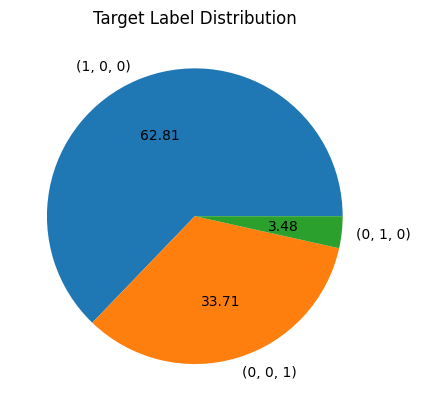

In [41]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [42]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [43]:
# for the next step i presume

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 3091 to 5884
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N    

In [45]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [46]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()

In [47]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy, 0.1, 0.1)

In [48]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 3091 to 5884
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6269 non-null   float64
 1   N_Days         6282 non-null   float64
 2   Drug           6281 non-null   float64
 3   Age            6277 non-null   float64
 4   Sex            6280 non-null   float64
 5   Ascites        6277 non-null   float64
 6   Hepatomegaly   6258 non-null   float64
 7   Spiders        6259 non-null   float64
 8   Bilirubin      6281 non-null   float64
 9   Cholesterol    6278 non-null   float64
 10  Albumin        6277 non-null   float64
 11  Copper         6271 non-null   float64
 12  Alk_Phos       6260 non-null   float64
 13  SGOT           6267 non-null   float64
 14  Tryglicerides  6259 non-null   float64
 15  Platelets      6277 non-null   float64
 16  Prothrombin    6275 non-null   float64
 17  Stage          6269 non-null   float64
 18  N    

In [49]:
NaN_count = train_copy.isna().sum(axis = 0)
NaN_count

id               55
N_Days           42
Drug             43
Age              47
Sex              44
Ascites          47
Hepatomegaly     66
Spiders          65
Bilirubin        43
Cholesterol      46
Albumin          47
Copper           53
Alk_Phos         64
SGOT             57
Tryglicerides    65
Platelets        47
Prothrombin      49
Stage            55
N                52
S                56
Y                55
C                63
CL               52
D                51
dtype: int64

## KNN imputation 

In [62]:
from sklearn.impute import KNNImputer

In [121]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=15) # K optimised through trial and error to reduce MSE 

# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy)

# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [114]:
# Check no values are missing 
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [111]:
# the original and imputed dataframes are different 
KNN_imputed_df.equals(train)

False

In [122]:
# measuring the MSE between the original and imputed dataframes 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train.values, KNN_imputed_df.values)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1645.0918945757157
